In [39]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [40]:
#the dataset must be in the same path as juypter notebook
train_df = pd.read_csv("traindata.csv")
val_df = pd.read_csv("validata.csv")

In [41]:
#separting the labels from the data frame and binarizing them
y_train = train_df['label']
y_val = val_df['label']
del train_df['label']
del val_df['label']
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_val = label_binarizer.fit_transform(y_val)

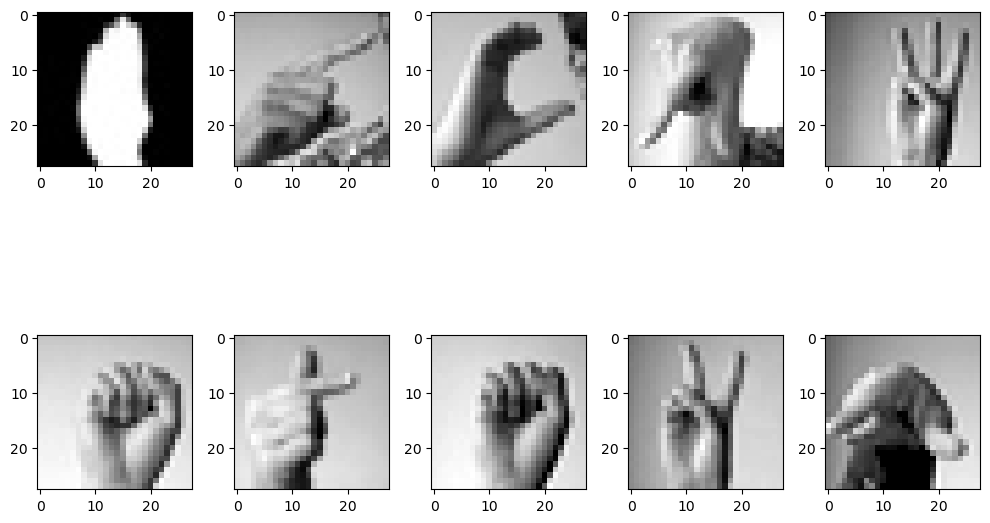

In [42]:
x_train = train_df.values
x_val = val_df.values
x_train = x_train / 255
x_val = x_val / 255
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)


f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [43]:
# Creating a CNN model with 2D convolutional layer, a max pooling layer and 128 units fully connected layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 24)                3096      
                                                                 
Total params: 695,768
Trainable params: 695,768
Non-trainable params: 0
________________________________________________

In [44]:
#manipulate the image data set to obtain more images with shifted and flipeed dimensions to increase learning potential
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False) 
datagen.fit(x_train)

In [45]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20, validation_data = (x_val, y_val) )

Epoch 1/20
85/85 [==============================] - 15s 161ms/step - loss: 2.9894 - accuracy: 0.1247 - val_loss: 2.5134 - val_accuracy: 0.2308
Epoch 2/20
85/85 [==============================] - 13s 153ms/step - loss: 2.3381 - accuracy: 0.3036 - val_loss: 1.8369 - val_accuracy: 0.4610
Epoch 3/20
85/85 [==============================] - 13s 156ms/step - loss: 1.9440 - accuracy: 0.4125 - val_loss: 1.4268 - val_accuracy: 0.5618
Epoch 4/20
85/85 [==============================] - 13s 152ms/step - loss: 1.6895 - accuracy: 0.4925 - val_loss: 1.2507 - val_accuracy: 0.6253
Epoch 5/20
85/85 [==============================] - 11s 131ms/step - loss: 1.5135 - accuracy: 0.5451 - val_loss: 1.0535 - val_accuracy: 0.6985
Epoch 6/20
85/85 [==============================] - 10s 123ms/step - loss: 1.3622 - accuracy: 0.5903 - val_loss: 0.9547 - val_accuracy: 0.7005
Epoch 7/20
85/85 [==============================] - 12s 136ms/step - loss: 1.2244 - accuracy: 0.6302 - val_loss: 0.8495 - val_accuracy: 0.7380

In [46]:
model.evaluate(x_val,y_val)[1]*100 

225/225 [==============================] - 2s 10ms/step - loss: 0.3847 - accuracy: 0.8875


88.74790668487549

In [47]:
predict_x=model.predict(x_val) 
predictions=np.argmax(predict_x,axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]    

225/225 [==============================] - 2s 8ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

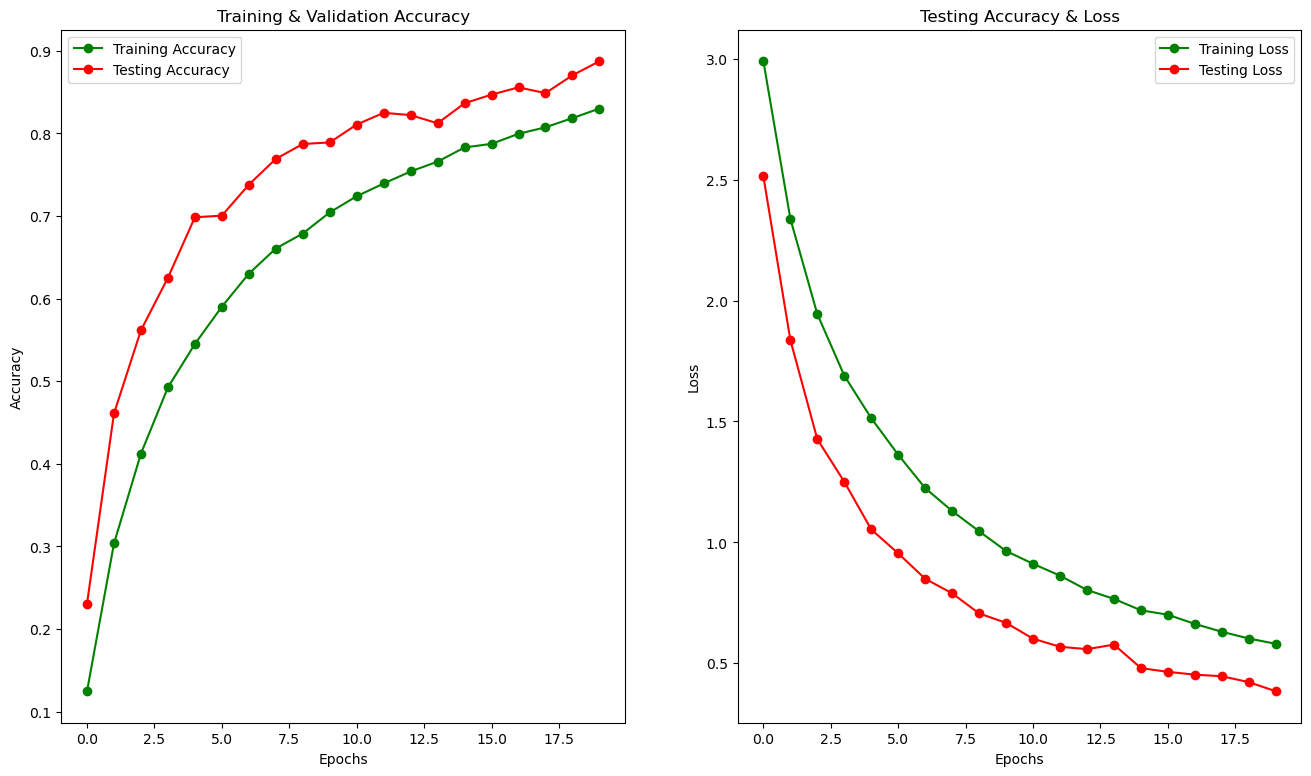

In [48]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [49]:
test = pd.read_csv("testdata.csv")
y = test['label']
del test['label']
testim = test.values
testim = testim / 255
testim = testim.reshape(-1,28,28,1)
correct = (predictions == y).to_numpy()
print(correct)
cor = correct.nonzero()[0]

[ True  True  True ...  True  True  True]


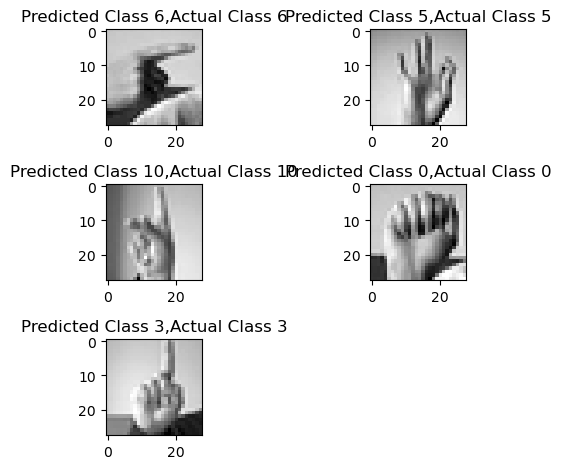

In [50]:
i = 0
for c in cor[:5]:
    plt.subplot(3,2,i+1)
    plt.imshow(testim[c], cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1